### Import Python Packages and Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from lifelines import *
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

### Importing and Analyzing the Dataset

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()
# No missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Data Visualization

Text(0.5, 1.0, 'Gender Distribution Among the Customers')

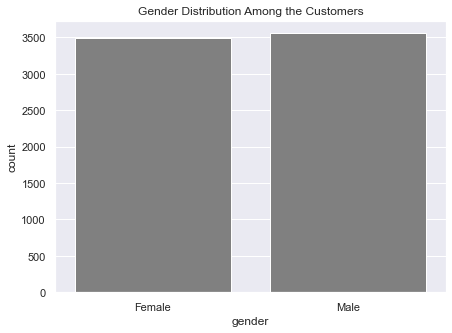

In [5]:
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(7,5)})

sns.countplot(x='gender',
             data = df,
             color = 'gray'
             ).set_title('Gender Distribution Among the Customers')

Text(0.5, 1.0, 'Distribution of Senior Citizens grouped by Partners')

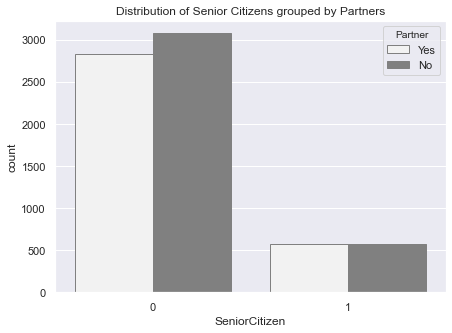

In [6]:
sns.countplot(x='SeniorCitizen', hue='Partner',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Distribution of Senior Citizens grouped by Partners')

Text(0.5, 1.0, 'Customers with Dependents')

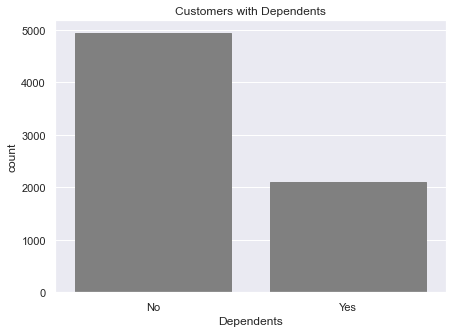

In [7]:
sns.countplot(x='Dependents',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Customers with Dependents')

Text(0.5, 1.0, 'Dependents and Partner Distribution among the Customers')

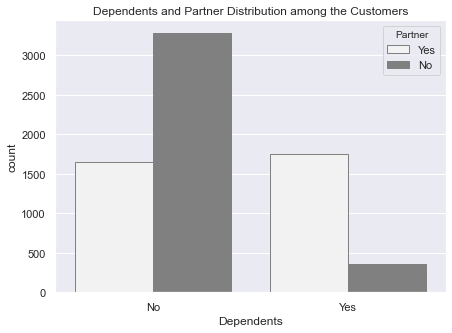

In [8]:
sns.countplot(x='Dependents', hue='Partner',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Dependents and Partner Distribution among the Customers')

Text(0.5, 1.0, 'Dependents and Senior Citizen Distribution')

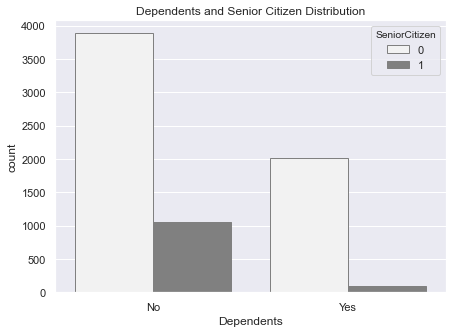

In [9]:
sns.countplot(x='Dependents', hue = 'SeniorCitizen',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Dependents and Senior Citizen Distribution')

Text(0.5, 1.0, 'Customers with Phone Service')

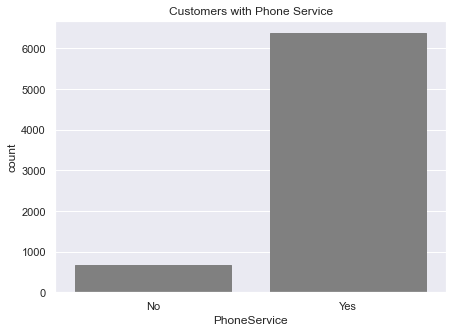

In [10]:
sns.countplot(x='PhoneService',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Customers with Phone Service')

Text(0.5, 1.0, 'Gender Distribution and Multiple Lines')

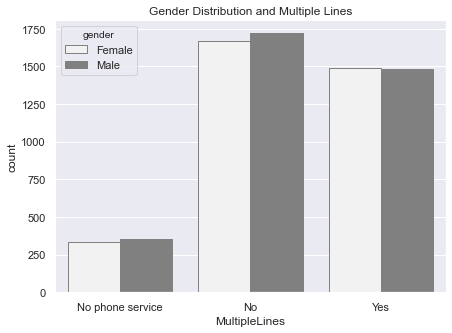

In [11]:
sns.countplot(x='MultipleLines', hue = 'gender',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Gender Distribution and Multiple Lines')

Text(0.5, 1.0, 'Phone Service and Multiple Lines')

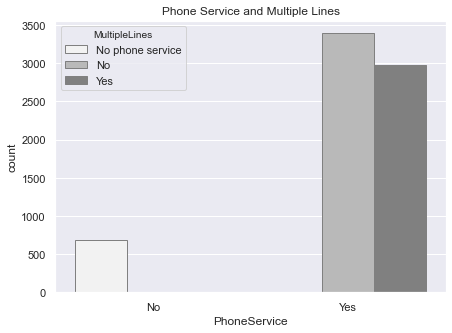

In [12]:
sns.countplot(x='PhoneService', hue = 'MultipleLines',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Phone Service and Multiple Lines')

Text(0.5, 1.0, 'Internet Service')

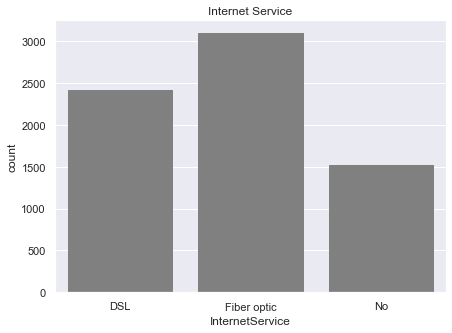

In [13]:
sns.countplot(x='InternetService',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service')

Text(0.5, 1.0, 'Online Security')

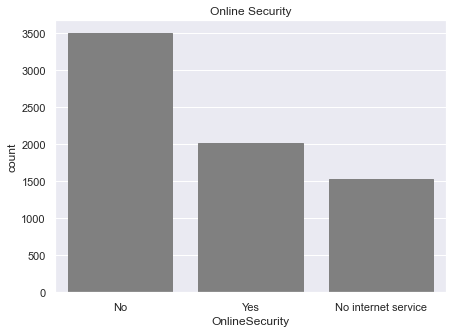

In [14]:
sns.countplot(x='OnlineSecurity',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Online Security')

Text(0.5, 1.0, 'Internet Service and Online Security')

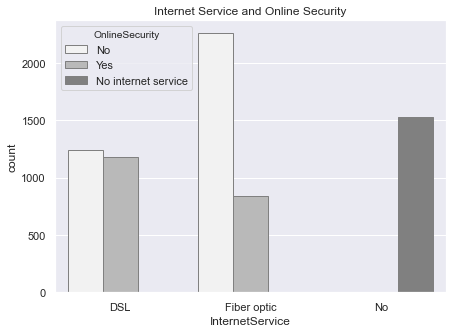

In [15]:
sns.countplot(x='InternetService', hue = 'OnlineSecurity',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Online Security')

Text(0.5, 1.0, 'Internet Service and Online Backup')

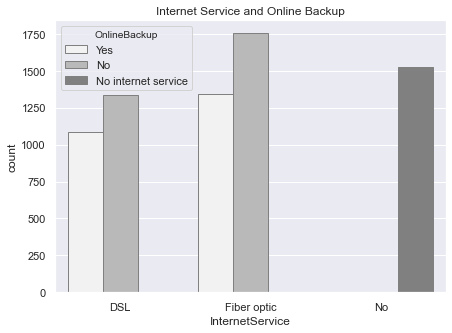

In [16]:
sns.countplot(x='InternetService', hue = 'OnlineBackup',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Online Backup')

Text(0.5, 1.0, 'Internet Service and Device Protection')

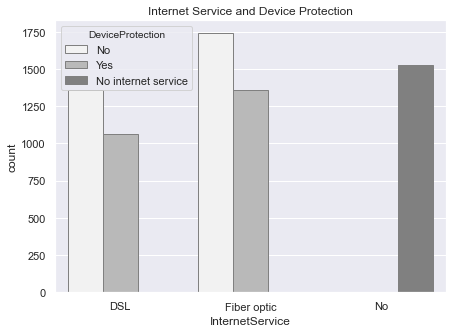

In [17]:
sns.countplot(x='InternetService', hue = 'DeviceProtection',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Device Protection')

Text(0.5, 1.0, 'Internet Service and Tech Support')

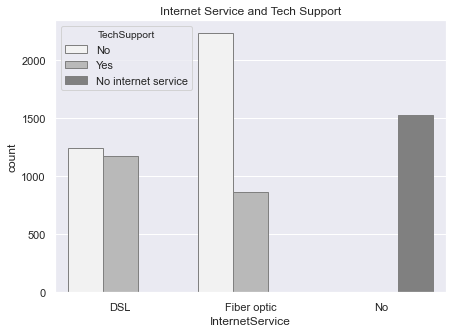

In [18]:
sns.countplot(x='InternetService', hue = 'TechSupport',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Tech Support')

Text(0.5, 1.0, 'Internet Service and Streaming TV')

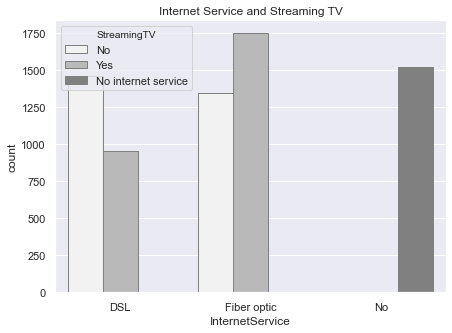

In [19]:
sns.countplot(x='InternetService', hue = 'StreamingTV',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Streaming TV')

Text(0.5, 1.0, 'Internet Service and Streaming Movies')

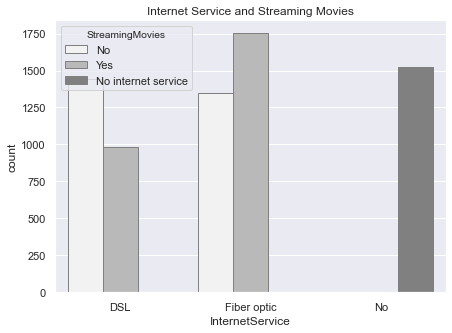

In [20]:
sns.countplot(x='InternetService', hue = 'StreamingMovies',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Internet Service and Streaming Movies')

Text(0.5, 1.0, 'Types of Contracts among the Customers')

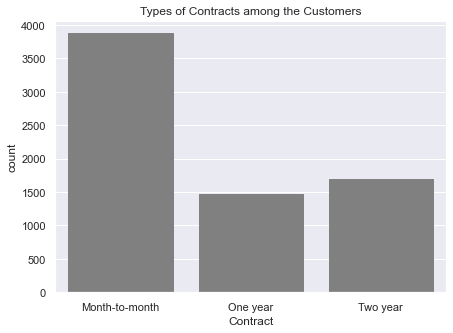

In [21]:
sns.countplot(x='Contract',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Types of Contracts among the Customers')

Text(0.5, 1.0, 'Contract Type and Paperless Billing')

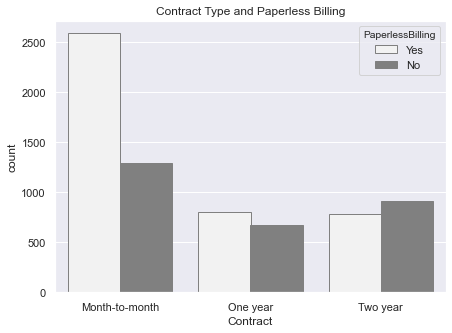

In [22]:
sns.countplot(x='Contract', hue = 'PaperlessBilling',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Contract Type and Paperless Billing')

Text(0.5, 1.0, 'Contract Type and Payment Method')

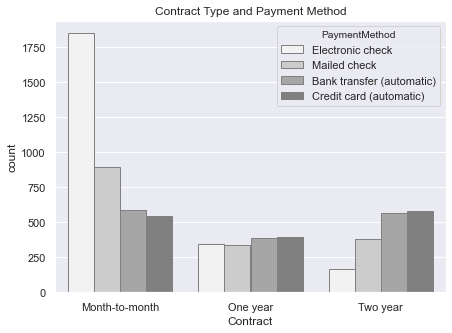

In [23]:
sns.countplot(x='Contract', hue = 'PaymentMethod',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Contract Type and Payment Method')

Text(0.5, 1.0, 'Churning Customers grouped by Gender')

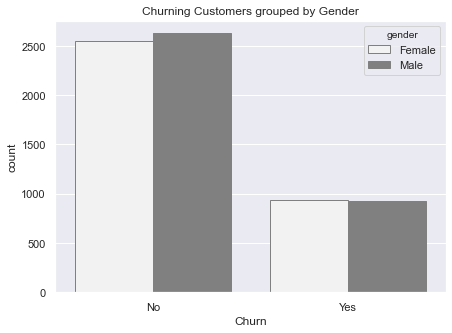

In [24]:
sns.countplot(x='Churn', hue = 'gender',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Gender')

Text(0.5, 1.0, 'Churning Customers grouped by Senior or Normal Citizens')

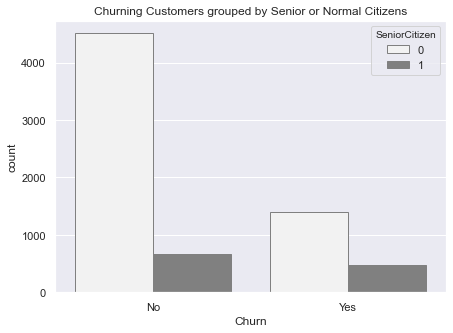

In [25]:
sns.countplot(x='Churn', hue = 'SeniorCitizen',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Senior or Normal Citizens')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Partners')

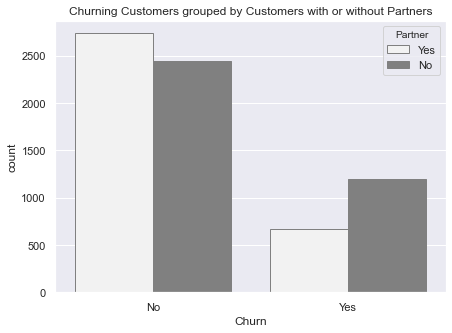

In [26]:
sns.countplot(x='Churn', hue = 'Partner',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Partners')

Text(0.5, 1.0, 'Churning Customers grouped by Dependents or No Dependents')

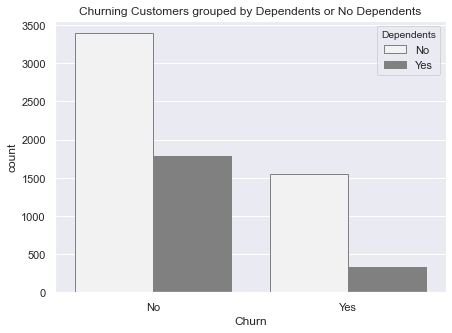

In [27]:
sns.countplot(x='Churn', hue = 'Dependents',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Dependents or No Dependents')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Phone Service')

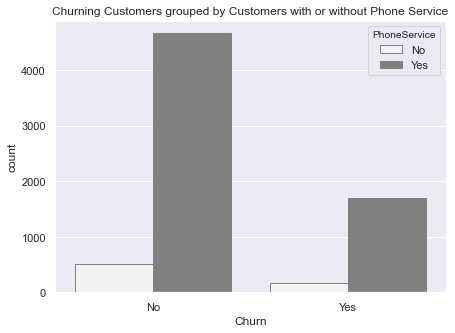

In [28]:
sns.countplot(x='Churn', hue = 'PhoneService',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Phone Service')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Multiple Phone Lines')

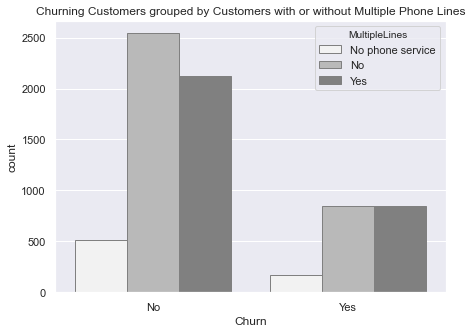

In [29]:
sns.countplot(x='Churn', hue = 'MultipleLines',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Multiple Phone Lines')

Text(0.5, 1.0, 'Churning Customers grouped by type of Internet Service')

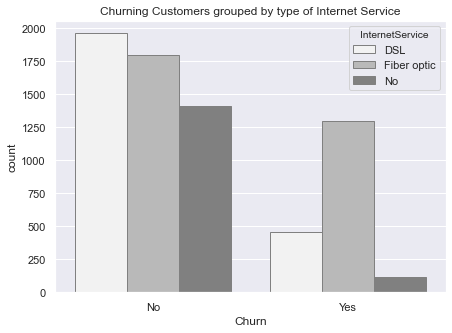

In [30]:
sns.countplot(x='Churn', hue = 'InternetService',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by type of Internet Service')

Text(0.5, 1.0, 'Churning Customers grouped by type of Online Security')

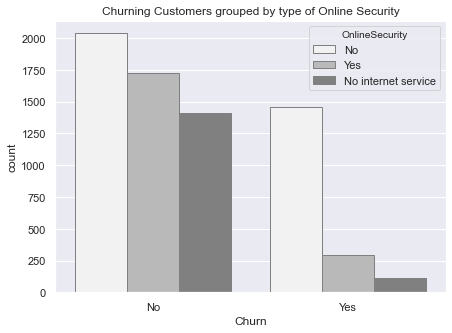

In [31]:
sns.countplot(x='Churn', hue = 'OnlineSecurity',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by type of Online Security')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Online Backup')

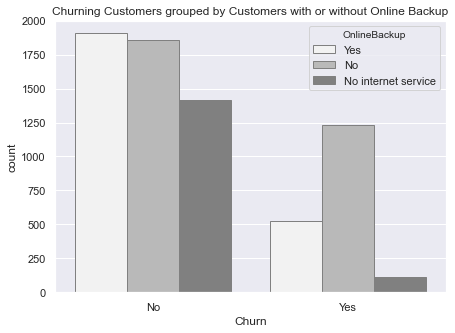

In [32]:
sns.countplot(x='Churn', hue = 'OnlineBackup',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Online Backup')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Device Protection')

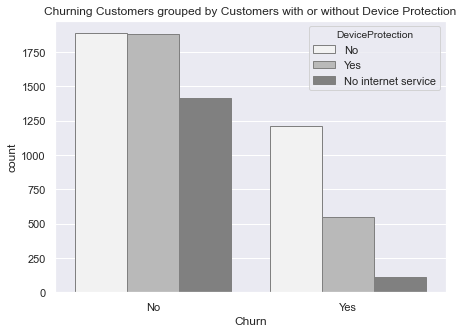

In [33]:
sns.countplot(x='Churn', hue = 'DeviceProtection',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Device Protection')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Tech Support')

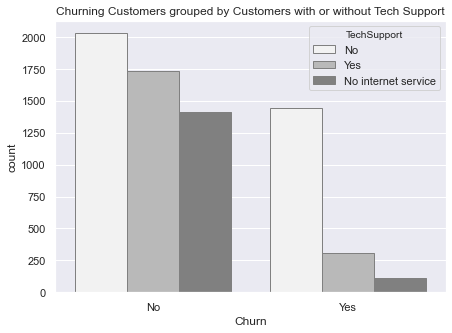

In [34]:
sns.countplot(x='Churn', hue = 'TechSupport',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Tech Support')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Streaming TV')

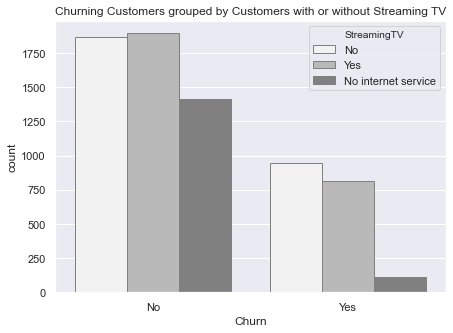

In [35]:
sns.countplot(x='Churn', hue = 'StreamingTV',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Streaming TV')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Streaming Movies')

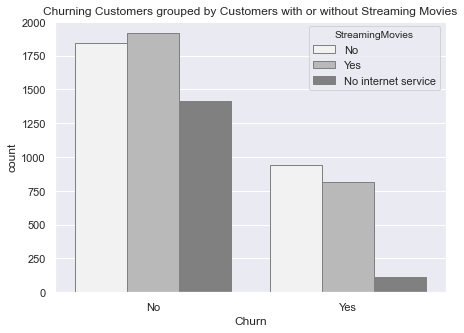

In [36]:
sns.countplot(x='Churn', hue = 'StreamingMovies',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Streaming Movies')

Text(0.5, 1.0, 'Churning Customers grouped by the Contract Type')

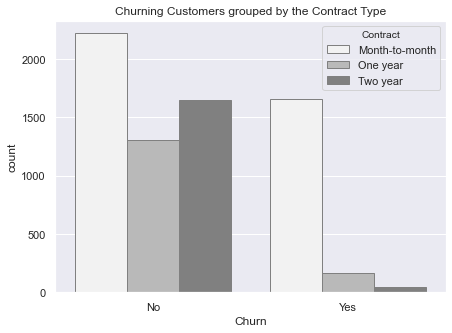

In [37]:
sns.countplot(x='Churn', hue = 'Contract',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by the Contract Type')

Text(0.5, 1.0, 'Churning Customers grouped by Customers with or without Paperless Billing')

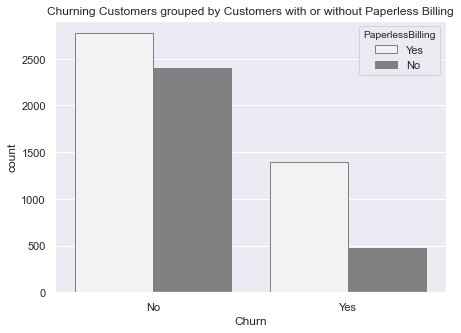

In [38]:
sns.countplot(x='Churn', hue = 'PaperlessBilling',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by Customers with or without Paperless Billing')

Text(0.5, 1.0, 'Churning Customers grouped by the type of Payment Method')

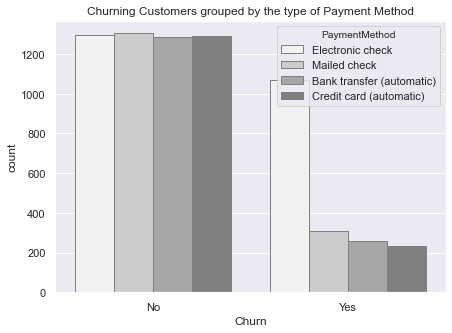

In [39]:
sns.countplot(x='Churn', hue = 'PaymentMethod',
             data = df,
             color = 'gray',
              edgecolor=sns.color_palette('gray', 1)
             ).set_title('Churning Customers grouped by the type of Payment Method')

<AxesSubplot:>

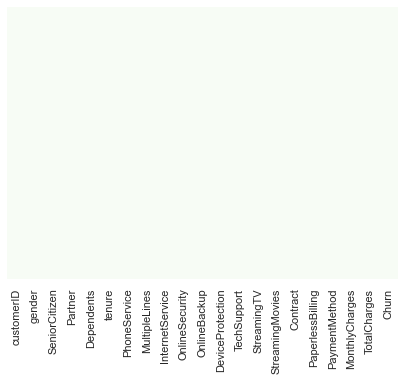

In [40]:
# Checking for Null Values
# In this case, there are no Null values since we cannot see any lines in the figure below
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Greens')

### Data Analysis

In [41]:
df[['Churn', 'gender', 'customerID']].groupby(['gender', 'Churn']).count()

customerID
gender Churn            
Female No           2549
       Yes           939
Male   No           2625
       Yes           930

In [42]:
df[['Churn', 'SeniorCitizen', 'customerID']].groupby(['SeniorCitizen', 'Churn']).count()

customerID
SeniorCitizen Churn            
0             No           4508
              Yes          1393
1             No            666
              Yes           476

In [43]:
df[['gender', 'SeniorCitizen', 'Churn', 'customerID']].groupby(['gender', 'SeniorCitizen', 'Churn']).count()

customerID
gender SeniorCitizen Churn            
Female 0             No           2221
                     Yes           699
       1             No            328
                     Yes           240
Male   0             No           2287
                     Yes           694
       1             No            338
                     Yes           236

### Data Preprocessing
We are creating a new column that has the value 1 if the customer is a Female. Otherwise, it will have a value of 0 in case if the customer is a Male.

In [44]:
print(df.gender.value_counts())
df['Female'] = df['gender'] == 'Female'
df['Female'] = df['Female'].astype(int)
df.drop('gender', axis =1, inplace = True)

Male      3555
Female    3488
Name: gender, dtype: int64


In [45]:
print(df.Female.value_counts())

0    3555
1    3488
Name: Female, dtype: int64


We are modifying the Partner column to be 1 if the customer has a partner and 0 otherwise.

In [46]:
print(df.Partner.value_counts())
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

No     3641
Yes    3402
Name: Partner, dtype: int64


In [47]:
print(df.Partner.value_counts())

0    3641
1    3402
Name: Partner, dtype: int64


The Senior Citizen column is already in the desired format, so we do not need to modify it.

In [48]:
df.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

We are modifying the Dependents column to be 1 if the customer has Dependent and 0 otherwise.

In [49]:
print(df.Dependents.value_counts())
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

No     4933
Yes    2110
Name: Dependents, dtype: int64


In [50]:
print(df.Dependents.value_counts())

0    4933
1    2110
Name: Dependents, dtype: int64


We are modifying the Phone Service column to be 1 if the customer has Phone Service Available and 0 otherwise.

In [51]:
print(df.PhoneService.value_counts())
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

Yes    6361
No      682
Name: PhoneService, dtype: int64


In [52]:
print(df.PhoneService.value_counts())

1    6361
0     682
Name: PhoneService, dtype: int64


We are modifying the Multiple Lines column to be 1 if the customer has Multiple Lines and 0 otherwise.

In [53]:
print(df.MultipleLines.value_counts())
df['MultipleLines'] = df['MultipleLines'].map({'Yes':1, 'No':0, 'No phone service': 0})

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


In [54]:
print(df.MultipleLines.value_counts())

0    4072
1    2971
Name: MultipleLines, dtype: int64


In [55]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

We are modifying the Online Security column to be 1 if the customer has Online Security and 0 otherwise.

In [56]:
print(df.OnlineSecurity.value_counts())
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


In [57]:
print(df.OnlineSecurity.value_counts())

0    5024
1    2019
Name: OnlineSecurity, dtype: int64


We are modifying the Online Backup column to be 1 if the customer has Online Backup and 0 otherwise.

In [58]:
print(df.OnlineBackup.value_counts())
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service':0})

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


In [59]:
print(df.OnlineBackup.value_counts())

0    4614
1    2429
Name: OnlineBackup, dtype: int64


We are modifying the Device Protection column to be 1 if the customer has Device Protection and 0 otherwise.

In [60]:
print(df.DeviceProtection.value_counts())
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service':0})

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


In [61]:
print(df.DeviceProtection.value_counts())

0    4621
1    2422
Name: DeviceProtection, dtype: int64


We are modifying the Tech Support column to be 1 if the customer has Tech Support and 0 otherwise.

In [62]:
print(df.TechSupport.value_counts())
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service':0})

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


In [63]:
print(df.TechSupport.value_counts())

0    4999
1    2044
Name: TechSupport, dtype: int64


We are modifying the Streaming TV column to be 1 if the customer has Streaming TV and 0 otherwise.

In [64]:
print(df.StreamingTV.value_counts())
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service':0})

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


In [65]:
print(df.StreamingTV.value_counts())

0    4336
1    2707
Name: StreamingTV, dtype: int64


We are modifying the Streaming Movies column to be 1 if the customer has Streaming TV and 0 otherwise.

In [66]:
print(df.StreamingMovies.value_counts())
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service':0})

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


In [67]:
print(df.StreamingMovies.value_counts())

0    4311
1    2732
Name: StreamingMovies, dtype: int64


We will One-Hot Encode the Contract Column later.

In [68]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

We are modifying the Paperless Billing column to be 1 if the customer has Paperless Billing and 0 otherwise.

In [69]:
print(df.PaperlessBilling.value_counts())
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No':0})

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


In [70]:
print(df.PaperlessBilling.value_counts())

1    4171
0    2872
Name: PaperlessBilling, dtype: int64


We will One-Hot Encode the Payment Method Column later.

In [71]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

We are modifying the Churn column to be 1 if the customer has Churned and 0 otherwise.

In [72]:
print(df.Churn.value_counts())
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

No     5174
Yes    1869
Name: Churn, dtype: int64


In [73]:
print(df.Churn.value_counts())

0    5174
1    1869
Name: Churn, dtype: int64


Taking Care of a few missing values in the Total Charges column.

In [74]:
# Since the number of missing values in this column is low, we replace them with mean
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan).astype(float)
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace = True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [76]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Female
0,7590-VHVEG,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,0
2,3668-QPYBK,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0
3,7795-CFOCW,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,0
4,9237-HQITU,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1


Training multiple Kaplan Meier Fitter Models

In [77]:
T = df['tenure']
E = df['Churn']

In [78]:
# from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 7043 total observations, 5174 right-censored observations>

<AxesSubplot:xlabel='timeline'>

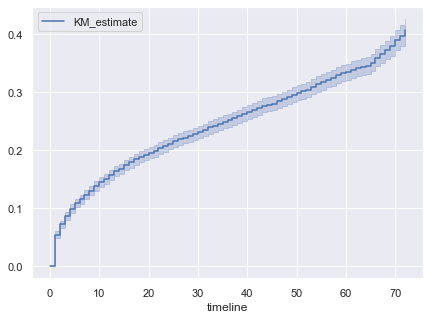

In [79]:
# print(kmf.cumulative_density_)
kmf.plot_cumulative_density()

<AxesSubplot:xlabel='timeline'>

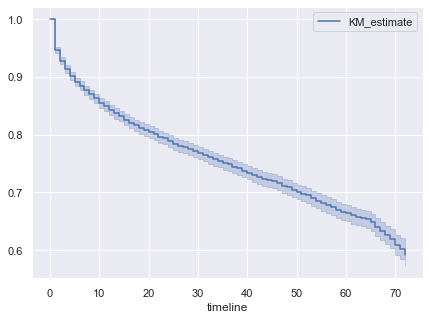

In [80]:
kmf.plot_survival_function()

In [81]:
median_ = kmf.median_survival_time_
# The estimated median time to event. np.inf if doesn't exist
print('Median Value: ' + str(median_))

Median Value: inf


### Survival Analysis of Churning Customer Groups

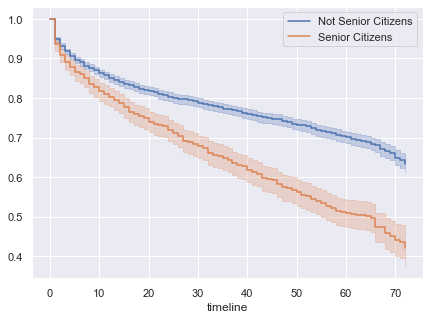

In [82]:
seniorCitizen = (df['SeniorCitizen']==1)

kmf.fit(T[~seniorCitizen], E[~seniorCitizen], label = 'Not Senior Citizens')
ax = kmf.plot()

kmf.fit(T[seniorCitizen], E[seniorCitizen], label = 'Senior Citizens')
ax = kmf.plot(ax=ax)

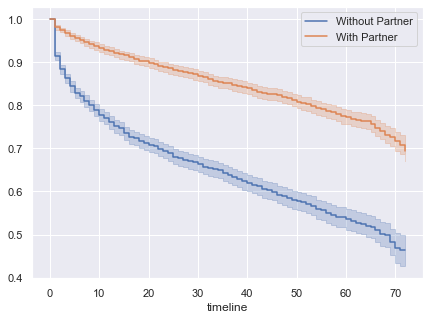

In [84]:
Partner = (df['Partner']==1)

kmf.fit(T[~Partner], E[~Partner], label = 'Without Partner')
ax = kmf.plot()

kmf.fit(T[Partner], E[Partner], label = 'With Partner')
ax = kmf.plot(ax=ax)

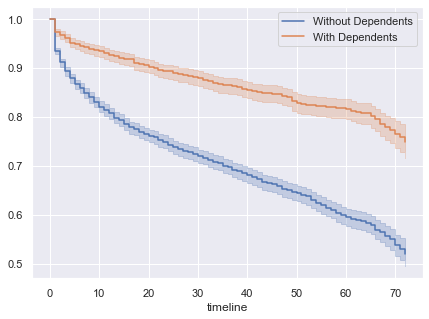

In [85]:
Dependents = (df['Dependents']==1)

kmf.fit(T[~Dependents], E[~Dependents], label = 'Without Dependents')
ax = kmf.plot()

kmf.fit(T[Dependents], E[Dependents], label = 'With Dependents')
ax = kmf.plot(ax=ax)

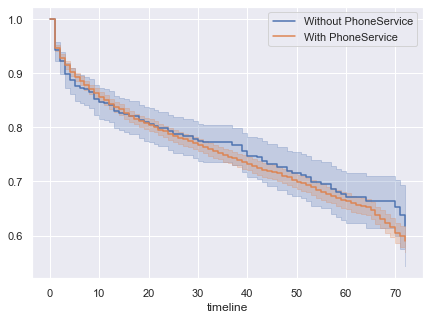

In [86]:
PhoneService = (df['PhoneService']==1)

kmf.fit(T[~PhoneService], E[~PhoneService], label = 'Without PhoneService')
ax = kmf.plot()

kmf.fit(T[PhoneService], E[PhoneService], label = 'With PhoneService')
ax = kmf.plot(ax=ax)

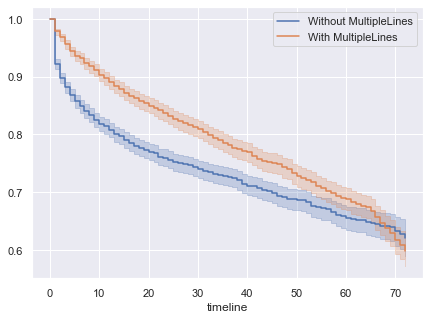

In [87]:
MultipleLines = (df['MultipleLines']==1)

kmf.fit(T[~MultipleLines], E[~MultipleLines], label = 'Without MultipleLines')
ax = kmf.plot()

kmf.fit(T[MultipleLines], E[MultipleLines], label = 'With MultipleLines')
ax = kmf.plot(ax=ax)

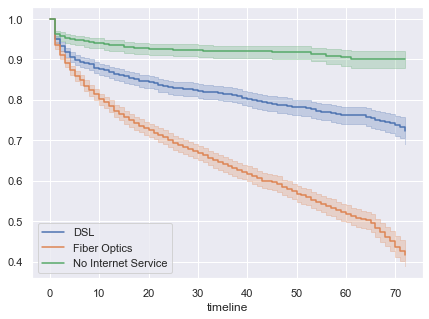

In [88]:
InternetServiceDSL = (df['InternetService']=='DSL')
InternetServiceFiberOptic = (df['InternetService']=='Fiber optic')
NoInternetService = (df['InternetService']=='No')

kmf.fit(T[InternetServiceDSL], E[InternetServiceDSL], label ='DSL')
ax = kmf.plot()

kmf.fit(T[InternetServiceFiberOptic], E[InternetServiceFiberOptic], label ='Fiber Optics')
ax = kmf.plot()

kmf.fit(T[NoInternetService], E[NoInternetService], label ='No Internet Service')
ax = kmf.plot()

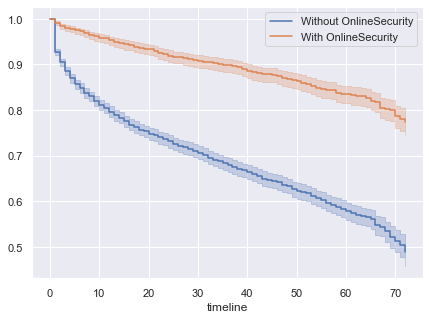

In [89]:
OnlineSecurity = (df['OnlineSecurity']==1)

kmf.fit(T[~OnlineSecurity], E[~OnlineSecurity], label = 'Without OnlineSecurity')
ax = kmf.plot()

kmf.fit(T[OnlineSecurity], E[OnlineSecurity], label = 'With OnlineSecurity')
ax = kmf.plot(ax=ax)

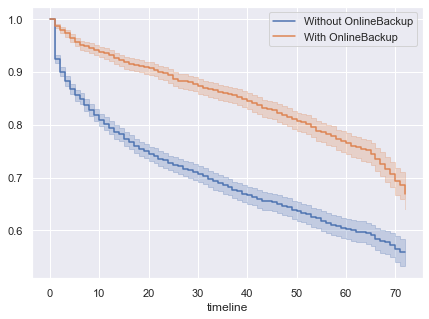

In [92]:
OnlineBackup = (df['OnlineBackup']==1)

kmf.fit(T[~OnlineBackup], E[~OnlineBackup], label = 'Without OnlineBackup')
ax = kmf.plot()

kmf.fit(T[OnlineBackup], E[OnlineBackup], label = 'With OnlineBackup')
ax = kmf.plot(ax=ax)